In [10]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import altair as alt

In [2]:
gdp = pd.read_csv(r'C:\Users\Clayton\Documents\gdp_components.csv', 
                  index_col=['DATE'], parse_dates=['DATE'])
gdp.head()

,PCEC,GPDI,GCE,NETEXP
DATE,,,,
1970-01-01,631.685,168.113,247.889,3.514
1970-04-01,641.570,171.455,249.143,5.207
1970-07-01,653.482,173.904,254.584,4.088
1970-10-01,660.161,166.754,258.708,2.985
1971-01-01,679.186,189.495,261.905,4.570


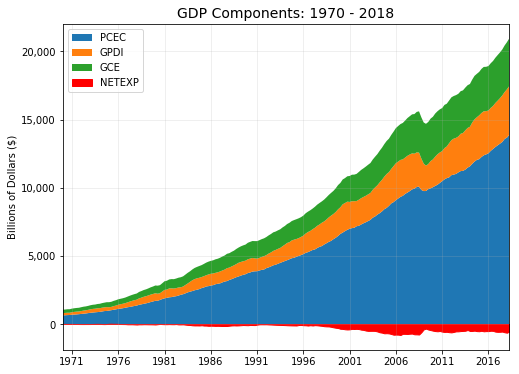

In [32]:
fig, ax = plt.subplots(figsize=(8,6))

plt.stackplot(gdp.index, gdp['PCEC'], gdp['GPDI'], gdp['GCE'], 
              labels=['PCEC', 'GPDI', 'GCE'])

plt.stackplot(gdp.index, gdp['NETEXP'], color='red', 
              labels=['NETEXP'])

plt.title('GDP Components: 1970 - 2018', fontsize=14)
plt.xlim(('1970-01-01', '2018-04-01'))
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Billions of Dollars ($)')
plt.grid(alpha=0.25)
plt.legend(loc='upper left')
plt.savefig(r'C:\Users\Clayton\Documents\gdp_components_mpl.png')
plt.show()

In [4]:
gdp2 = gdp.copy()
gdp2 = gdp2.reset_index().melt('DATE')
gdp2.head()

,DATE,variable,value
0,1970-01-01,PCEC,631.685
1,1970-04-01,PCEC,641.570
2,1970-07-01,PCEC,653.482
3,1970-10-01,PCEC,660.161
4,1971-01-01,PCEC,679.186


In [17]:
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

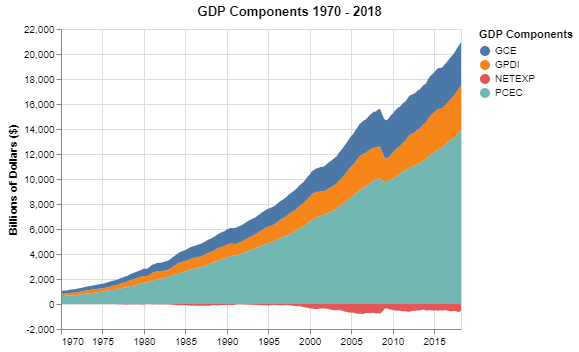

In [23]:
alt.Chart(gdp2).mark_area().encode(
    x=alt.X('DATE', axis=alt.Axis(title='')), 
    y=alt.Y('value', axis=alt.Axis(title='Billions of Dollars ($)')),
    color=alt.Color('variable', legend=alt.Legend(title="GDP Components"))
).properties(title='GDP Components 1970 - 2018')